## Contents

* Introduction
* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages
* Stage 2 : Pra-pemrosesan
    * 2.1 Inisialisasi
    * 2.2 Memuat Data
    * 2.3 Mempersiapkan Data
    * 2.4 Paket Prabayar
    * 2.5 Pesan/SMS
    * 2.6 Internet
    * 2.7 Paket Prabayar
* Stage 3 : Data Preparation
    * 3.1 Mempersiapkan Data
    * 3.2 Memperbaiki Data
    * 3.3 Memperkaya Kualitas Data Data
        * 3.3.1 Join Table
        
* Stage 4 : Exploratory Data Analysis (EDA).
    * 4.1 Berapakah total income di setiap paket per bulannya?
    * 4.2 Berapakah rata-rata income customer di setiap paket perbulannya?
    * 4.3 Bagamaina distribusi rata-rata pendapatan user di setiap paket?
    * 4.4 Bagaimana korelasi antara penggunaan internet dan pendapatan di setiap paket?

* Stage 5 : Analisis Data Statistik
    * 5.1 Mempelajari Syarat dan Kondisi Terkait Paket Prabayar
    * 5.2 Mempelajari Perilaku Pengguna
        * 5.2.1 Panggilan
        * 5.2.2 Pesan/SMS
        * 5.2.3 Internet
    * 5.3 Pendapatan

* Stage 6 : Menguji Hipotesis Statistik
    * 6.1 Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
    * 6.2 Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain
* Stage 7 : Kesimpulan Umum


##  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, kita akan menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan sehingga departemen periklanan bisa membuat anggaran iklan yang sesuai. Pihak departemen periklanan telah memberi kita beberapa data, yang mana data tersebut akan dilakukan uji hipotesis berrikut :

   * Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
   * Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

# Data Overview

**Paket Prabayar Manakah yang Lebih Baik?**

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

## Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Mencari tahu dan menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan sehingga departemen periklanan bisa membuat anggaran iklan yang sesuai.
    
## Stages

Data yang berasal dari departemen periklanan disimpan dalam file :
1. /datasets/megaline_calls.csv  
2. /datasets/megaline_internet.csv 
3. /datasets/megaline_messages.csv 
4. /datasets/megaline_plans.csv  
5. /datasets/megaline_users.csv 

Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari empat tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)
    4. Analisis Data Statistik

# Pra-pemrosesan

## Inisialisasi

Muat semua library yang dibutuhkan

In [1]:
# Import Library Data Processing
import pandas as pd, numpy as np

# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns

# Import library Statistics
from scipy.stats import ttest_ind,shapiro, mannwhitneyu

## Memuat Data

Muat semua file data ke dalam data frame yang berbeda

In [2]:
# Load Data Calls
calls = pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
# Load Data internet
internet = pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
# Load Data messages
messages = pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
# Load Data plans
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
# Load Data users
users = pd.read_csv('/datasets/megaline_users.csv')

## Pengguna

In [7]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
users.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 8 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   user_id     500 non-null    int64 

 1   first_name  500 non-null    object

 2   last_name   500 non-null    object

 3   age         500 non-null    int64 

 4   city        500 non-null    object

 5   reg_date    500 non-null    object

 6   plan        500 non-null    object

 7   churn_date  34 non-null     object

dtypes: int64(2), object(6)

memory usage: 31.4+ KB


In [8]:
# Tampilkan sampel data pengguna
users.sample(n=5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
152,1152,Merrill,Hogan,35,"Orlando-Kissimmee-Sanford, FL MSA",2018-11-01,surf,NaN
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI MSA",2018-10-05,surf,NaN
439,1439,Moses,Cabrera,28,"Riverside-San Bernardino-Ontario, CA MSA",2018-01-04,surf,NaN
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN


* Berdasarkan data diatas, data users tidak memiliki nilai yang hilang, terdapat tipe data yang tidak sesuai pada kolom reg_date dan churn_date, harusnya bernilai datetime. Akan tetapi 2 kolom tersebut nantinya tidak diperlukan, maka dari itu tidak perlu di ganti ke tipe data datet time.

* Nantinya kita akan membersihkan kolom city dengan menampilkan kode kotanya saja agar lebih mudah di baca dan memfilternya sesuai permintaan.

## Panggilan

In [9]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 137735 entries, 0 to 137734

Data columns (total 4 columns):

 #   Column     Non-Null Count   Dtype  

---  ------     --------------   -----  

 0   id         137735 non-null  object 

 1   user_id    137735 non-null  int64  

 2   call_date  137735 non-null  object 

 3   duration   137735 non-null  float64

dtypes: float64(1), int64(1), object(2)

memory usage: 4.2+ MB


In [10]:
# Tampilkan sampel data berisi panggilan
calls.sample(n=10)

,id,user_id,call_date,duration
66112,1239_195,1239,2018-12-07,18.24
74941,1264_252,1264,2018-06-16,0.00
23939,1090_111,1090,2018-09-10,6.51
100546,1359_428,1359,2018-06-08,14.67
81128,1292_80,1292,2018-08-16,0.00
100669,1359_553,1359,2018-09-01,8.17
8991,1041_426,1041,2018-12-22,3.69
104181,1366_390,1366,2018-09-03,0.00
98132,1352_496,1352,2018-12-31,2.07
29308,1110_359,1110,2018-06-04,0.00


* Berdasarkan data diatas, data calls tidak memiliki nilai yang hilang, akan tetapi terdapat tipe data yang salah pada kolom call_date yang bernilai object, nantinya kita akan merubah tipe data tersebut ke tipe data datetime.

## Pesan/SMS

In [11]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 76051 entries, 0 to 76050

Data columns (total 3 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   id            76051 non-null  object

 1   user_id       76051 non-null  int64 

 2   message_date  76051 non-null  object

dtypes: int64(1), object(2)

memory usage: 1.7+ MB


In [12]:
# Tampilkan sampel data untuk SMS
messages.sample(n=5)

,id,user_id,message_date
50374,1329_218,1329,2018-10-20
25732,1155_98,1155,2018-09-29
15261,1101_318,1101,2018-11-08
67741,1439_135,1439,2018-09-07
73357,1470_985,1470,2018-06-18


* Berdasarkan data diatas, data messages tidak memiliki nilai yang hilang, akan tetapi terdapat tipe data yang salah pada kolom message_date yang bernilai object, nantinya kita akan merubah tipe data tersebut ke tipe data datetime.

## Internet

In [13]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 104825 entries, 0 to 104824

Data columns (total 4 columns):

 #   Column        Non-Null Count   Dtype  

---  ------        --------------   -----  

 0   id            104825 non-null  object 

 1   user_id       104825 non-null  int64  

 2   session_date  104825 non-null  object 

 3   mb_used       104825 non-null  float64

dtypes: float64(1), int64(1), object(2)

memory usage: 3.2+ MB


In [14]:
# Tampilkan sampel data untuk traffic internet
internet.sample(n=5)

,id,user_id,session_date,mb_used
93207,1434_459,1434,2018-05-12,0.00
95150,1444_101,1444,2018-10-21,510.26
54703,1247_118,1247,2018-11-07,543.99
54985,1249_197,1249,2018-07-25,0.00
42262,1187_439,1187,2018-07-11,401.63


* Berdasarkan data diatas, data internet tidak memiliki nilai yang hilang, akan tetapi terdapat tipe data yang salah pada kolom session_date yang bernilai object, nantinya kita akan merubah tipe data tersebut ke tipe data datetime.

## Paket Prabayar

In [15]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2 entries, 0 to 1

Data columns (total 8 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   messages_included      2 non-null      int64  

 1   mb_per_month_included  2 non-null      int64  

 2   minutes_included       2 non-null      int64  

 3   usd_monthly_pay        2 non-null      int64  

 4   usd_per_gb             2 non-null      int64  

 5   usd_per_message        2 non-null      float64

 6   usd_per_minute         2 non-null      float64

 7   plan_name              2 non-null      object 

dtypes: float64(2), int64(5), object(1)

memory usage: 256.0+ bytes


In [16]:
# Tampilkan sampel data untuk paket-paket tersebut
plans.sample(n=2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


* Berdasarkan data diatas, data plans aman dari masalah, semua tipe data benar, tidak terdapat missing values, tidak terdapat duplikat juga. Dan nantinya kita tinggal memperbaiki nilai pada data tersebut sesuai ketentuan yang di minta

In [17]:
# cek duplikasi
print('message duplicate', messages.duplicated().sum())
print('internet duplicate', internet.duplicated().sum())
print('calls duplicate', calls.duplicated().sum())
print('users duplicate', users.duplicated().sum())

message duplicate 0

internet duplicate 0

calls duplicate 0

users duplicate 0


**Kesimpulan Sementara**

1. Tidak ada missing value dan nilai duplikat pada dataset
2. Tipe data pada data tanggal masih dalam format string dan perlu di ubah ke format datetime
3. Kelima dataset harus dijadikan satu
4. Semua definisi dalam satu row harus dalam format bulanan

# Data Preparation

## Mempersiapkan Data

In [18]:
# Buat function untuk mendapatkan tahun-bulan dari tiap row
def to_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

In [19]:
# Bikin kolom year-month di table calls
calls['month'] = to_month(calls, 'call_date')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [20]:
# Bikin kolom year-month di table messages
messages['month'] = to_month(messages, 'message_date')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [21]:
# Bikin kolom year-month di table internet
internet['month'] = to_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


* Tipe data pada data tanggal yang awalnya dalam format string telah di ubah ke format datetime

In [22]:
# Cek data city di table users
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Cape Coral-Fort Myers, FL MSA                       1
Greensboro-High Point, NC MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Raleigh-Cary, NC MSA                                1
Stockton, CA MSA                                    1
Name: city, Length: 73, dtype: int64

In [23]:
# Bersihkan data city di table users
users['clean_city'] = users['city'].str.split(', ').str[1]
users['clean_city'] = users['clean_city'].str.replace(' MSA', '')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA


In [24]:
# Bikin kolom penanda bahwa daerah tersebut NY-NJ dan lain2
users['is-nynj'] = users['clean_city'].str.contains('NY-NJ', regex=True)
users['is-nynj'] = users['is-nynj'].replace(True, 1).replace(False, 0)
users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is-nynj
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ-PA,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,LA,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,CA,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ-PA,1
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,FL,0


**Kesimpulan sementara**
1. Tipe data pada data tanggal yang awalnya dalam format string telah di ubah ke format datetime
2. Menambahkan kolom baru clean_city yang telah dibersihkan dan berisi singkatan atau kode kota untuk mempermudah proses analisis
3. Memfilter clean_city yang berisi kota NY-NJ, jika true maka tampilkan 1, jika false tampilkan 0 pada kolom baru is_nynj

## Memperbaiki Data

In [25]:
# Pembulatan ke atas untuk kolom duration call
calls['duration_rounded'] = np.ceil(calls['duration']).astype('int16')
calls.head()

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,2018-12,9
1,1000_145,1000,2018-12-27,13.66,2018-12,14
2,1000_247,1000,2018-12-27,14.48,2018-12,15
3,1000_309,1000,2018-12-28,5.76,2018-12,6
4,1000_380,1000,2018-12-30,4.22,2018-12,5


* Memperbaiki tipe data duration pada kolom calls

**Mengagregasi Data per Pengguna**

Mengagregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode.

In [26]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
calls_agg = calls.groupby(['user_id','month']).agg({
    'id':'count',
    'duration_rounded':'sum'
}).reset_index().rename(columns={
    'id' : 'counts_calls',
    'duration_rounded': 'total_duration'
})
calls_agg

,user_id,month,counts_calls,total_duration
0,1000,2018-12,16,124
1,1001,2018-08,27,182
2,1001,2018-09,49,315
3,1001,2018-10,65,393
4,1001,2018-11,64,426
...,...,...,...,...
2253,1498,2018-12,39,339
2254,1499,2018-09,41,346
2255,1499,2018-10,53,385
2256,1499,2018-11,45,308


In [27]:
# internet calls per month
internet_agg = pd.pivot_table(internet,
                           index=['user_id', 'month'],
                           values='mb_used',
                           aggfunc='sum').reset_index()
internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [28]:
# convert ke GB dan jika ada kelebihan dibulatkan ke atas
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used'] / 1024)
internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


In [29]:
# Agregasi data messages 
message_agg = pd.pivot_table(messages, 
                             index=['user_id', 'month'], 
                             values='id',
                             aggfunc='count').reset_index()
message_agg.columns = ['user_id', 'month', 'sms']
message_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


* Mengagregasikan kolom-kolom sesuai ketentuan yang diminta

In [30]:
# ubah mb per month menjadi gb per month
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [31]:
# Hapus kolom yang tidak dibutuhkan
plans.drop('mb_per_month_included', axis=1, inplace=True)
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


* Melakukan pembulatan keatas pada kolom mb_per_month_included sesuai ketentuan

In [32]:
# drop kolom yang tidak dibutuhkan pada tabel users
users.drop(['city', 'first_name', 'last_name'], axis=1, inplace=True)
users.head()

,user_id,age,reg_date,plan,churn_date,clean_city,is-nynj
0,1000,45,2018-12-24,ultimate,NaN,GA,0
1,1001,28,2018-08-13,surf,NaN,WA,0
2,1002,36,2018-10-21,surf,NaN,NV,0
3,1003,52,2018-01-28,surf,NaN,OK,0
4,1004,40,2018-05-23,surf,NaN,WA,0


* Menghapus kolom yang tidak dibutuhkan pada tabel users, untuk mempermudah proses analisis


## Memperkaya Kualitas Data

### Join Table

In [33]:
# Gabungkan table users dengan plan
table_users = users.merge(plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
table_users.tail()

,user_id,age,reg_date,plan,churn_date,clean_city,is-nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
495,1495,67,2018-09-04,surf,NaN,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
496,1496,49,2018-02-20,surf,NaN,LA,0,50,500,20,10,0.03,0.03,15.0
497,1497,49,2018-12-10,ultimate,NaN,CA,0,1000,3000,70,7,0.01,0.01,30.0
498,1498,51,2018-02-04,surf,NaN,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
499,1499,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0


In [34]:
# Gabungkan semua table
main = calls_agg.merge(internet_agg, how='outer', on=['user_id', 'month'])
main = main.merge(message_agg, how='outer', on=['user_id', 'month'])
df = main.merge(table_users, how='left', on='user_id')
df.tail()

,user_id,month,counts_calls,total_duration,mb_used,gb_used,sms,age,reg_date,plan,churn_date,clean_city,is-nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
2288,1349,2018-10,NaN,NaN,13093.55,13.0,76.0,69,2018-10-01,surf,NaN,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0,72.0,69,2018-10-01,surf,NaN,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0,61.0,69,2018-10-01,surf,NaN,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2291,1361,2018-05,NaN,NaN,1519.69,2.0,2.0,45,2018-04-14,surf,NaN,AL,0,50,500,20,10,0.03,0.03,15.0
2292,1482,2018-10,NaN,NaN,NaN,NaN,2.0,70,2018-01-01,ultimate,NaN,NY-NJ-PA,1,1000,3000,70,7,0.01,0.01,30.0


* Menggabungkan semua tabel, agar lebih mudah untuk dianalisis

In [35]:
# drop kolom yang tidak dibutuhkan
df.drop(['mb_used', 'reg_date', 'churn_date'], axis=1, inplace=True)
df.head()

,user_id,month,counts_calls,total_duration,gb_used,sms,age,plan,clean_city,is-nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,16.0,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,27.0,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,49.0,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,65.0,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,64.0,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0


* Menghapus kolom yang tidak perlu, untuk mempermudah analisis

In [36]:
# Isi missing value di kolom numerikal dengan 0
df[['total_duration', 'gb_used', 'sms']] = df[['total_duration', 'gb_used', 'sms']].fillna(0)

In [37]:
# buat kolom untuk menghitung biaya ekstra pada telepon
df['extra_calls'] = (df['total_duration'] - df['minutes_included']) * df['usd_per_minute']

# Harga minus artinya tidak berlebihan dan harus diganti 0
df.loc[df['extra_calls'] < 0, 'extra_calls'] = 0

In [38]:
# buat kolom untuk menghitung biaya ekstra pada internet
df['extra_internet'] = (df['gb_used'] - df['gb_per_month_included']) * df['usd_per_gb']

# Harga minus artinya tidak berlebihan dan harus diganti 0
df.loc[df['extra_internet'] < 0, 'extra_internet'] = 0

In [39]:
# buat kolom untuk menghitung biaya ekstra pada message
df['extra_sms'] = (df['sms'] - df['messages_included']) * df['usd_per_message']

# Harga minus arinya tidak berlebihan dan harus diganti 0
df.loc[df['extra_sms'] < 0, 'extra_sms'] = 0

In [40]:
# cek data
df

,user_id,month,counts_calls,total_duration,gb_used,sms,age,plan,clean_city,is-nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms
0,1000,2018-12,16.0,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00
1,1001,2018-08,27.0,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00
2,1001,2018-09,49.0,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00
3,1001,2018-10,65.0,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,70.0,0.09
4,1001,2018-11,64.0,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,40.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,0.0,13.0,76.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.78
2289,1349,2018-11,NaN,0.0,17.0,72.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0,0.0,20.0,0.66
2290,1349,2018-12,NaN,0.0,13.0,61.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.33
2291,1361,2018-05,NaN,0.0,2.0,2.0,45,surf,AL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00


* Mengisi kolom yang kosong dengan nilai 0 sesuai ketentuan dan menambah kolom baru.

In [41]:
# kolom untuk total_payment
df['total_payment'] = df['usd_monthly_pay'] + df['extra_calls'] + df['extra_internet'] + df['extra_sms']
df.tail()

,user_id,month,counts_calls,total_duration,gb_used,sms,age,plan,clean_city,is-nynj,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_payment
2288,1349,2018-10,NaN,0.0,13.0,76.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.78,20.78
2289,1349,2018-11,NaN,0.0,17.0,72.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,20.0,0.66,40.66
2290,1349,2018-12,NaN,0.0,13.0,61.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.33,20.33
2291,1361,2018-05,NaN,0.0,2.0,2.0,45,surf,AL,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
2292,1482,2018-10,NaN,0.0,0.0,2.0,70,ultimate,NY-NJ-PA,1,...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00


* Membuat kolom baru yaitu total_payment yang merupakan jumlah total pembayaran user ketika membeli paket dan biaya tambahannya.

**Kesimpulan Sementara**
1. Memperbaiki tipe data duration pada kolom calls 
2. Mengagregasikan kolom-kolom sesuai ketentuan yang diminta
3. Melakukan pembulatan keatas pada kolom mb_per_month_included sesuai ketentuan
4. Menghapus kolom yang tidak dibutuhkan pada tabel users, untuk mempermudah proses analisis
5. Menggabungkan semua tabel, agar lebih mudah untuk dianalisis
6. Menghapus kolom yang tidak perlu, untuk mempermudah analisis
7. Mengisi kolom yang kosong dengan nilai 0 sesuai ketentuan dan menambah kolom baru.
8. Membuat kolom baru yaitu total_payment yang merupakan jumlah total pembayaran user ketika membeli paket dan biaya tambahannya.

# Exploratory Data Analysis (EDA)

* Keywords
    
    * Pendapatan
    * Paket
    * Perilaku client


* Questions
    1. Berapakah total income di setiap paket per bulannya?
    2. Berapakah rata-rata income customer di setiap paket per bulannya?
    3. Bagaimana distribusi rata-rata pendapatan user di setiap paket?
    4. Bagaimana korelasi antara penggunaan internet dan pendapatan di setiap paket?

## Berapakah total income di setiap paket per bulannya?

In [42]:
# Persiapkan dataset
income_monthly = pd.pivot_table(df, index='month', 
                                columns='plan',
                                values='total_payment', 
                                aggfunc='sum').reset_index()

# Karena tipe data period M (Month) tidak bisa divisualisasikan, maka kita jadikan sebagai string
income_monthly['month'] = income_monthly['month'].astype(str)
income_monthly

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,309.57,490.0
2,2018-03,1056.65,896.0
3,2018-04,2035.53,1533.0
4,2018-05,3667.37,2051.0
5,2018-06,4779.80,3367.0
6,2018-07,7583.56,4242.0
7,2018-08,10356.85,5173.0
8,2018-09,11304.67,6195.0
9,2018-10,15504.83,7665.0


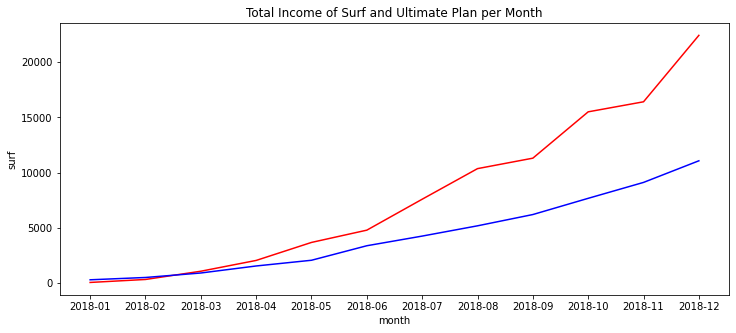

In [43]:
plt.figure(figsize=(12,5))
plt.title('Total Income of Surf and Ultimate Plan per Month')
sns.lineplot(data=income_monthly, x='month', y='surf', color='red')
sns.lineplot(data=income_monthly, x='month', y='ultimate', color='blue')
plt.show()

* findings 
    * Dari bulan april sampai desember paket surf memberikan kontribusi income yang lebih tinggi dibandingkan paket ultimate
    * Kedua Paket memiliki pertumbuhan income yang semakin tajam.

* insight
    * Kemungkinan hal yang menyebabkan total income di surf mampu mengalahkan ultimate adalah jumlah user yang semakin banyak
    * Paket yang lebih murah belum tentu memberikan kontribusi pendapatan yang sedikit.
    * Paket yang lebih mahal belum tentu memberikan kontribusi pendapatan yang banyak.

## Berapakah rata-rata income customer di setiap paket per bulannya?

In [44]:
avg_income = pd.pivot_table(df, index='month',
                            columns='plan',
                            values='total_payment',
                            aggfunc='mean').reset_index()

avg_income['month'] = avg_income['month'].astype(str)
avg_income

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


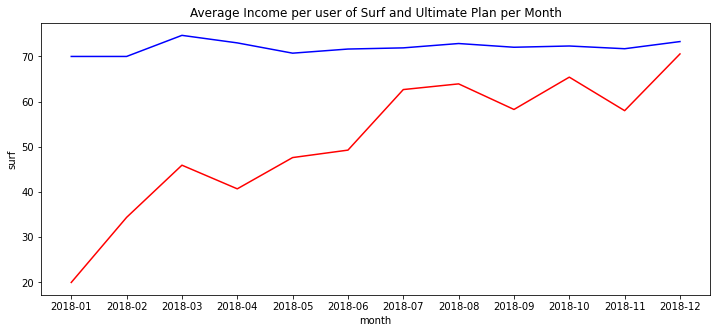

In [45]:
plt.figure(figsize=(12,5))
plt.title('Average Income per user of Surf and Ultimate Plan per Month')
sns.lineplot(data=avg_income, x='month', y='surf', color='red')
sns.lineplot(data=avg_income, x='month', y='ultimate', color='blue')
plt.show()

* findings
    * Rata-rata pengeluaran orang untuk membeli paket internet perbulannya lebih tinggi pada paket surf daripada ultimate
    * Rata-rata pengeluaran orang untuk membeli paket surf perbulannya semakin naik setiap bulannya secara fluktuatif
    
* insight
    * Pengguna paket surf biasanya membayar biaya tambahan untuk mendapat kuota internet / pulsa tambahan
    * Pengguna paket ultimate jarang yang membayar biaya tambahan untuk mendapat kuota internet / pulsa tambahan
    
* recommendation
    * Untuk pengguna disarankan untuk membeli paket ultimate karena benefitnya lebih banyak dan lebih murah daripada paket surf yang biaya tambahannya juga bertambah banyak terus.

## Bagaimana distribusi rata-rata pendapatan user di setiap paket?

In [46]:
avg_user = pd.pivot_table(df, index='user_id', 
                          columns='plan', 
                          values='total_payment',
                          aggfunc='mean').reset_index()
avg_user

plan,user_id,surf,ultimate
0,1000,NaN,70.0
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,158.120000,NaN
4,1004,76.250000,NaN
...,...,...,...
485,1495,118.325000,NaN
486,1496,28.000000,NaN
487,1497,NaN,70.0
488,1498,77.272727,NaN


In [47]:
# Dapatkan user yang surf
avg_surf = avg_user.loc[:, ['user_id', 'surf']].dropna()
avg_surf

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,158.120000
4,1004,76.250000
5,1005,40.000000
...,...,...
484,1494,30.625000
485,1495,118.325000
486,1496,28.000000
488,1498,77.272727


In [48]:
# Dapatkan user yang ultimate
avg_ultimate = avg_user.loc[:, ['user_id', 'ultimate']].dropna()
avg_ultimate

plan,user_id,ultimate
0,1000,70.000000
6,1006,77.000000
8,1008,70.000000
11,1011,70.000000
13,1013,70.000000
...,...,...
472,1482,70.000000
477,1487,70.000000
480,1490,114.333333
483,1493,70.000000


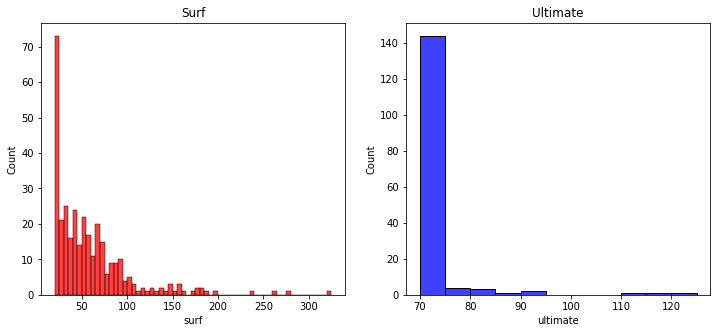

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(avg_surf['surf'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(avg_ultimate['ultimate'], binwidth=5, color='blue')
plt.show()

In [50]:
#  varians dan standar deviasi

# Surf
surf_std = round(avg_surf['surf'].std(), 1)
surf_var = round(avg_surf['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasi nya: {surf_std}')
print(f'Varians nya: {surf_var}')
print()

# Ultimate
ulti_std = round(avg_ultimate['ultimate'].std(), 1)
ulti_var = round(avg_ultimate['ultimate'].var(), 1)
print('Ultimate:')
print(f'Standar Deviasi nya: {ulti_std}')
print(f'Varians nya: {ulti_var}')
print()

Surf:

Standar Deviasi nya: 43.6

Varians nya: 1897.9



Ultimate:

Standar Deviasi nya: 7.4

Varians nya: 55.1




* Findings

    * Pada paket ultimate, kebanyakan user mengeluarkan uang di kisaran 70-75 dollar.
    * Pada paket Surf, banyak user yang melebihi paketnya sehingga biayanya mencapai lebih dari 20 (yaitu 25 - 200).
    * Standar deviasi dan varians dari surf adalah 43.6 dan 1897.9
    * Standar deviasi dan varians dari ultimate adalah 7.4 dan 55.1

* Insights

    * Sedikit user ultimate yang menambah paketnya.
    * Banyak user surf yang menambah paketnya bahkan pengeluarannya melebihi paket ultimate.
    * Income dari customer surf lebih bervariasi dibandingkan ultimate karena surf lebih banyak nambah paket. Dan value penambahannya bermacam-macam

## Bagaimana korelasi antara penggunaan internet dan pendapatan di setiap paket?

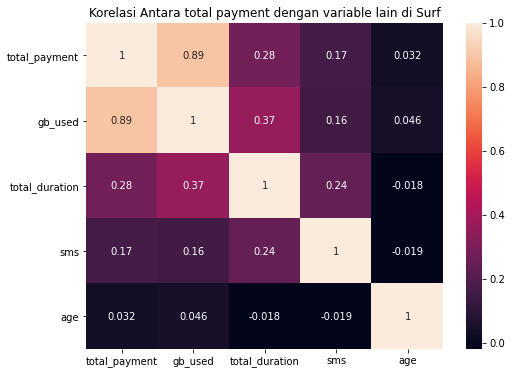

In [51]:
# Korelasi antara penggunaan internet dengan total payment di paket surf
surf_internet = df.loc[df['plan']== 'surf', ['total_payment', 'gb_used', 'total_duration', 'sms', 'age']]

# Kalau valuenya positif, artinya hubungan antar variable selaras (kalo satu naik, yang lainnya ikutan naik)
# Kalau valuenya negatif, artinya hubungan antar variable berlawanan (kalo satu naik, yang lainnya turun)
# Mendekati 0 (Tidak ada korelasi)
# 0.01 - 0.33 (Lemah)
# 0.33 - 0.66 (Medium)
# 0.66 - 1.00 (Tinggi)

plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara total payment dengan variable lain di Surf')
sns.heatmap(surf_internet.corr(), annot=True)
plt.show()

* Findings :

**Korelasi antara total payment dengan variabel lain di paket surf**

* A. Korelasi kolom total_payment dengan kolom lain 
    1. Korelasi total_payment dengan gb_used adalah 0.89 artinya semakin banyak total_payment maka semakin tinggi pula gb_used yang digunakan (korelasi tinggi)
    2. Korelasi total_payment dengan duration adalah 0.28 artinya semakin banyak total_payment maka duration juga akan semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    3. Korelasi total_payment dengan sms adalah 0.17 artinya semakin banyak total_payment maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    4. Korelasi total_payment dengan age adalah 0.032 artinya jumlah total_payment tidak ada pengaruh terhadap usia
    
    
* B. Korelasi kolom gb_used dengan kolom lain
    1. Korelasi gb_used dengan duration adalah 0.37 artinya semakin banyak gb_used digunakan maka durasi juga akan semakin naik akan tetapi tidak terlalu banyak (korelasi medium)
    2. Korelasi gb_used dengan sms adalah 0.16 artinya semakin banyak gb_used digunakan maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    3. Korelasi gb_used dengan age adalah 0.046 artinya jumlah gb_used tidak ada pengaruh terhadap usia
    
    
* C. Korelasi kolom duration dengan kolom lain
    1. Korelasi duration dengan sms adalah 0.24 artinya semakin banyak durasi maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    2. Korelasi duration dengan age adalah -0.018 artinya jumlah durasi tidak ada pengaruh terhadap usia
    
    
* D. Korelasi kolom sms dengan kolom lain
    1. Korelasi sms dengan age adalah -0.019 artinya jumlah sms tidak ada pengaruh terhadap usia

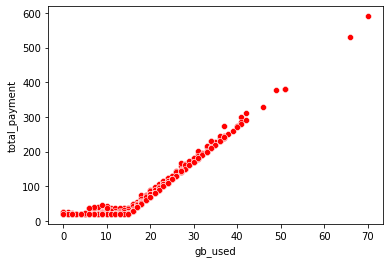

In [52]:
# visualisasi scatterplot untuk melihat korelasinya
sns.scatterplot(data=surf_internet, x='gb_used', y='total_payment', color='red')
plt.show()

* Berdasarkan visualisasi data diatas, grafik miring keatas setelah gb_used mencapai 15 gb, hal tersebut dapat disimpulkan bahwa korelasi gb_used penggunaan internet dengan total_payment memiliki korelasi yang kuat artinya semakin banyak penggunaan gb_used maka total_payment juga semakin tinggi (korelasi tinggi)

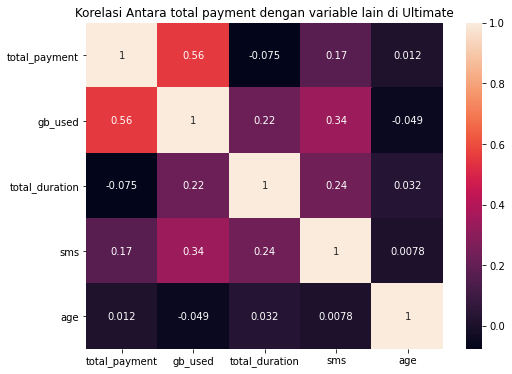

In [53]:
# Korelasi antara penggunaan internet dengan total payment di paket ultimate
ulti_internet = df.loc[df['plan']=='ultimate', ['total_payment', 'gb_used', 'total_duration', 'sms', 'age']]
plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara total payment dengan variable lain di Ultimate')
sns.heatmap(ulti_internet.corr(), annot=True)
plt.show()

* Findings :

**Korelasi antara total payment dengan variabel lain di paket ultimate**

* A. Korelasi kolom total_payment dengan kolom lain 
    1. Korelasi total_payment dengan gb_used adalah 0.56 artinya semakin banyak total_payment maka cukup tinggi pula gb_used yang digunakan (korelasi medium)
    2. Korelasi total_payment dengan duration adalah jumlah total_payment tidak ada pengaruh terhadap durasi 
    3. Korelasi total_payment dengan sms adalah 0.17 artinya semakin banyak total_payment maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    4. Korelasi total_payment dengan age adalah 0.012 artinya jumlah total_payment tidak ada pengaruh terhadap usia
    
    
* B. Korelasi kolom gb_used dengan kolom lain
    1. Korelasi gb_used dengan duration adalah 0.22 artinya semakin banyak gb_used digunakan maka durasi juga semakin naik akan tetapi tidak terlalu banyak (korelasi lemah)
    2. Korelasi gb_used dengan sms adalah 0.34 artinya semakin banyak gb_used digunakan maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi medium)
    3. Korelasi gb_used dengan age adalah -0.049 artinya jumlah gb_used tidak ada pengaruh terhadap usia
    
    
* C. Korelasi kolom duration dengan kolom lain
    1. Korelasi duration dengan sms adalah 0.24 artinya semakin banyak durasi maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
    2. Korelasi duration dengan age adalah 0.032 artinya jumlah durasi tidak ada pengaruh terhadap usia
    
    
* D. Korelasi kolom sms dengan kolom lain
    1. Korelasi sms dengan age adalah 0.0078 artinya jumlah sms tidak ada pengaruh terhadap usia

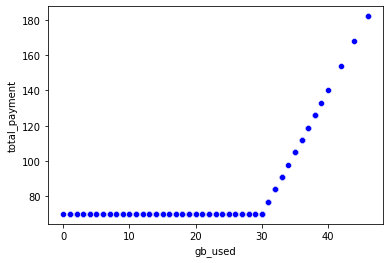

In [54]:
# visualisasi scatterplot untuk melihat korelasinya
sns.scatterplot(data=ulti_internet, x='gb_used', y='total_payment', color='blue')
plt.show()

* Berdasarkan visualisasi data diatas, grafik miring keatas setelah gb_used mencapai 30 gb, hal tersebut dapat disimpulkan bahwa korelasi gb_used penggunaan internet dengan total_payment memiliki korelasi yang sedang artinya semakin banyak penggunaan gb_used maka total_payment juga semakin tinggi namun tidak terlalu tinggi.

# Analisis Data Statistik

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [55]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df

,user_id,month,counts_calls,total_duration,gb_used,sms,age,plan,clean_city,is-nynj,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_payment
0,1000,2018-12,16.0,124.0,2.0,11.0,45,ultimate,GA,0,...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00
1,1001,2018-08,27.0,182.0,7.0,30.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
2,1001,2018-09,49.0,315.0,14.0,44.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
3,1001,2018-10,65.0,393.0,22.0,53.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,70.0,0.09,90.09
4,1001,2018-11,64.0,426.0,19.0,36.0,28,surf,WA,0,...,500,20,10,0.03,0.03,15.0,0.0,40.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,0.0,13.0,76.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.78,20.78
2289,1349,2018-11,NaN,0.0,17.0,72.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,20.0,0.66,40.66
2290,1349,2018-12,NaN,0.0,13.0,61.0,69,surf,MA-NH,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.33,20.33
2291,1361,2018-05,NaN,0.0,2.0,2.0,45,surf,AL,0,...,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00


## Mempelajari Perilaku Pengguna

### Panggilan

In [56]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [57]:
# Konversi kolom "month" ke tipe data string
df["month"] = df["month"].astype(str)

# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. 
average_duration_by_plan = df.groupby(["plan", "month"])["total_duration"].mean().reset_index()
average_duration_by_plan

,plan,month,total_duration
0,surf,2018-01,203.000000
1,surf,2018-02,297.000000
2,surf,2018-03,330.000000
3,surf,2018-04,351.540000
4,surf,2018-05,399.584416
5,surf,2018-06,431.298969
6,surf,2018-07,449.983471
7,surf,2018-08,410.111111
8,surf,2018-09,414.226804
9,surf,2018-10,429.729958


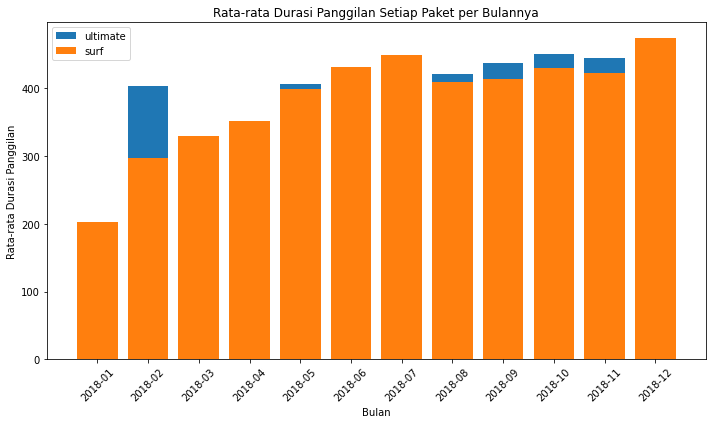

In [58]:
# Buatlah sebuah diagram batang untuk memvisualisasikannya.
plt.figure(figsize=(10, 6))
for plan in df["plan"].unique():
    plan_data = average_duration_by_plan[average_duration_by_plan["plan"] == plan]
    plt.bar(plan_data["month"], plan_data["total_duration"], label=plan)

plt.xlabel("Bulan")
plt.ylabel("Rata-rata Durasi Panggilan")
plt.title("Rata-rata Durasi Panggilan Setiap Paket per Bulannya")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya.
total_minutes_by_plan = df.groupby(["plan", "month"])["total_duration"].sum().reset_index()
total_minutes_by_plan

,plan,month,total_duration
0,surf,2018-01,406.0
1,surf,2018-02,2673.0
2,surf,2018-03,7590.0
3,surf,2018-04,17577.0
4,surf,2018-05,30768.0
5,surf,2018-06,41836.0
6,surf,2018-07,54448.0
7,surf,2018-08,66438.0
8,surf,2018-09,80360.0
9,surf,2018-10,101846.0


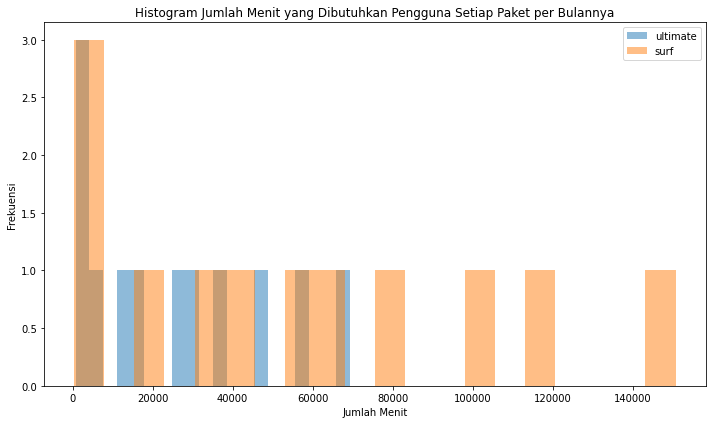

In [60]:
# Buatlah sebuah histogram.
plt.figure(figsize=(10, 6))
for plan in df["plan"].unique():
    plan_data = total_minutes_by_plan[total_minutes_by_plan["plan"] == plan]
    plt.hist(plan_data["total_duration"], bins=20, alpha=0.5, label=plan)

plt.xlabel("Jumlah Menit")
plt.ylabel("Frekuensi")
plt.title("Histogram Jumlah Menit yang Dibutuhkan Pengguna Setiap Paket per Bulannya")
plt.legend()
plt.tight_layout()
plt.show()

**Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula?**

* Uji Statistik : Two sample independent
* Hipotesis : 
    * H0: Rata-rata penggunaan call dari pengguna paket ultimate dan surf SAMA
    * H1: Rata-rata penggunaan call dari pengguna paket ultimate dan surf BEDA
* Alpha: 5%

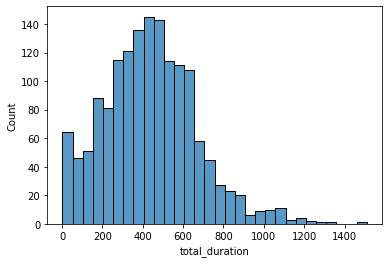

In [61]:
# Prepare dataset surf
duration_surf = df.loc[(df['plan']=='surf') & (df['total_duration'] > 0), 'total_duration']
sns.histplot(duration_surf)
plt.show()

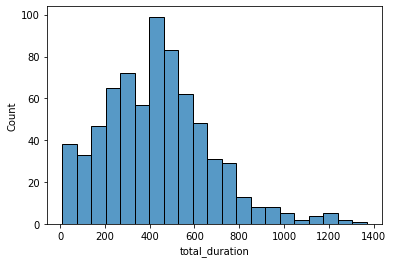

In [62]:
# Prepare dataset ultimate
duration_ultimate = df.loc[(df['plan']=='ultimate') & (df['total_duration'] > 0), 'total_duration']
sns.histplot(duration_ultimate)
plt.show()

In [63]:
# Buat function uji kenormalan
alpha = 0.05
def normality_test(series):
    p_value_shapiro = shapiro(series).pvalue
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha  : {alpha}')
    if p_value_shapiro >= alpha:
        print('H0 Diterima: Distribusi data tersebut adalah normal')
    else:
        print('H1 Diterima: Distribusi data tersebut adalah tidak normal')

In [64]:
# Uji Kenormalan dari distribusi duration surf dan ultimate
normality_test(duration_surf)
print('---------------------------')
normality_test(duration_ultimate)

P-Value: 2.953542900703543e-14

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal

---------------------------

P-Value: 2.2405648517076493e-11

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal


In [65]:
alpha = 0.05
p_value = mannwhitneyu(duration_surf, duration_ultimate, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata penggunaan call dari pengguna paket ultimate dan surf SAMA')
else:
    print('H1 Diterima: Rata-rata penggunaan call dari pengguna paket ultimate dan surf BEDA')

print('Rata2 call di surf', duration_surf.mean())
print('Rata2 call di ultimate', duration_ultimate.mean())

Alpha  : 0.05

P-Value: 0.614269803622298

H0 Diterima: Rata-rata penggunaan call dari pengguna paket ultimate dan surf SAMA

Rata2 call di surf 436.80246113989637

Rata2 call di ultimate 435.2865168539326


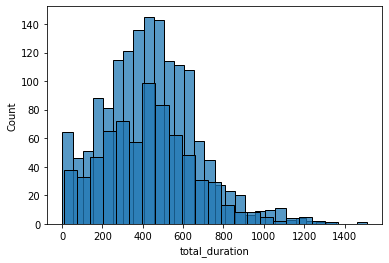

In [66]:
sns.histplot(duration_surf)
sns.histplot(duration_ultimate)
plt.show()

* Findings :
    * P-Value dari uji statistik rata2 call antara paket surf dan ultimate adalah 61.4%
    * Tidak ada perbedaan rata2 call antara paket surf dengan ultimate.

* Insights :
    * User yang menggunakan paket ultimate dan surf memiliki behavior call yang sama.
    * Artinya tidak ada perbedaan behavior dari kedua paket customer tersebut meskipun limitnya dari ultimate sangat tinggi

* Recommendation :
    * Kita bisa kurangi benefit dari paket ultimate
    * Atau kita naikkan benefit call dari paket ultimate agar menarik customer. Karena mau dinaikkan berapapun, tidak ada durasi call mencapai 3000 menit

### Pesan/SMS

In [67]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
# Kelompokkan data berdasarkan "plan" (paket) dan "month" (bulan) dan hitung jumlah SMS
monthly_sms_stats = df.groupby(["plan", df["month"].dt.strftime('%Y-%m')])["sms"].sum().reset_index()
monthly_sms_stats

,plan,month,sms
0,surf,2018-01,21.0
1,surf,2018-02,108.0
2,surf,2018-03,351.0
3,surf,2018-04,870.0
4,surf,2018-05,1849.0
5,surf,2018-06,2454.0
6,surf,2018-07,3271.0
7,surf,2018-08,4662.0
8,surf,2018-09,5968.0
9,surf,2018-10,8020.0


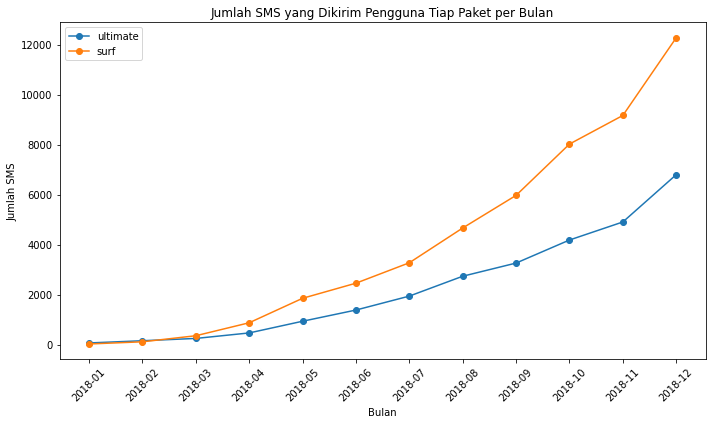

In [68]:
# Buat diagram batang atau grafik garis
plt.figure(figsize=(10, 6))
for plan in df["plan"].unique():
    plan_data = monthly_sms_stats[monthly_sms_stats["plan"] == plan]
    plt.plot(plan_data["month"], plan_data["sms"], label=plan, marker='o')

plt.xlabel("Bulan")
plt.ylabel("Jumlah SMS")
plt.title("Jumlah SMS yang Dikirim Pengguna Tiap Paket per Bulan")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Kesimpulan Sementara**

* A. Perilaku Pengguna Paket "Surf":
    * Pengguna paket "surf" cenderung mengirim jumlah SMS yang lebih tinggi daripada pengguna paket "ultimate" setiap bulannya. Terdapat fluktuasi dalam jumlah SMS yang dikirim oleh pengguna paket "surf" dari bulan ke bulan, dengan beberapa bulan mungkin mengalami peningkatan signifikan dalam pengiriman pesan.


* B. Perilaku Pengguna Paket "Ultimate":
    * Pengguna paket "ultimate" memiliki kecenderungan untuk mengirim jumlah SMS yang lebih rendah dibandingkan dengan pengguna paket "surf" setiap bulannya.
    * Meskipun jumlah SMS yang dikirim oleh pengguna paket "ultimate" lebih rendah, pola pengiriman pesan mereka lebih stabil dan memiliki variasi yang lebih kecil dari bulan ke bulan.
    
    
* Dari kesimpulan di atas, terlihat bahwa perilaku pengguna terkait pengiriman pesan berbeda antara paket "surf" dan "ultimate." Pengguna paket "surf" cenderung lebih aktif dalam mengirim SMS, sementara pengguna paket "ultimate" memiliki tingkat pengiriman pesan yang lebih rendah tetapi lebih stabil dari waktu ke waktu. Hal ini bisa menjadi informasi berharga bagi operator telekomunikasi untuk memahami preferensi dan kebutuhan pelanggan berdasarkan paket yang mereka pilih.

### Internet

In [69]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
# Kelompokkan data berdasarkan "plan" (paket) dan hitung jumlah traffic internet
total_internet_traffic = df.groupby("plan")["gb_used"].sum().reset_index()
total_internet_traffic

,plan,gb_used
0,surf,26223.0
1,ultimate,12461.0


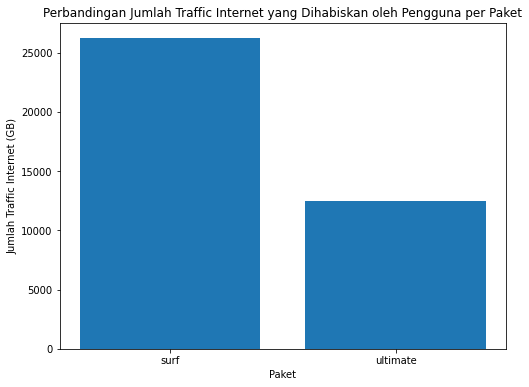

In [70]:
# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(total_internet_traffic["plan"], total_internet_traffic["gb_used"])
plt.xlabel("Paket")
plt.ylabel("Jumlah Traffic Internet (GB)")
plt.title("Perbandingan Jumlah Traffic Internet yang Dihabiskan oleh Pengguna per Paket")
plt.show()

**Kesimpulan Sementara**
* A. Perilaku Pengguna Paket "Surf":
    * Pengguna paket "surf" memiliki kecenderungan untuk mengonsumsi jumlah traffic internet yang lebih rendah dibandingkan dengan pengguna paket "ultimate."

* B. Perilaku Pengguna Paket "Ultimate":
    * Pengguna paket "ultimate" cenderung mengonsumsi jumlah traffic internet yang lebih tinggi daripada pengguna paket "surf."

* C. Perbandingan Penggunaan Data Internet Antar Paket:
    * Terdapat perbedaan signifikan dalam konsumsi data internet antara kedua paket, dengan paket "ultimate" memiliki penggunaan yang lebih tinggi dibandingkan dengan paket "surf."

* D. Variabilitas Perilaku Pengguna:
    * Penggunaan data internet oleh pengguna paket "surf" cenderung lebih bervariasi, dengan beberapa pengguna mungkin mengonsumsi lebih sedikit data internet, sementara yang lain mungkin membutuhkan lebih banyak.

* Perbedaan perilaku pengguna dalam mengonsumsi paket data internet antara paket "surf" dan "ultimate" dapat menjadi informasi yang berguna bagi operator telekomunikasi. Hal ini dapat digunakan untuk menyesuaikan kuota data dalam masing-masing paket, serta merancang promosi atau penawaran yang lebih sesuai dengan preferensi pelanggan.

## Pendapatan

In [71]:
# Kelompokkan data berdasarkan "plan" (paket) dan hitung total pendapatan
total_revenue = df.groupby("plan")["total_payment"].sum().reset_index()
total_revenue

,plan,total_payment
0,surf,95491.18
1,ultimate,52066.00


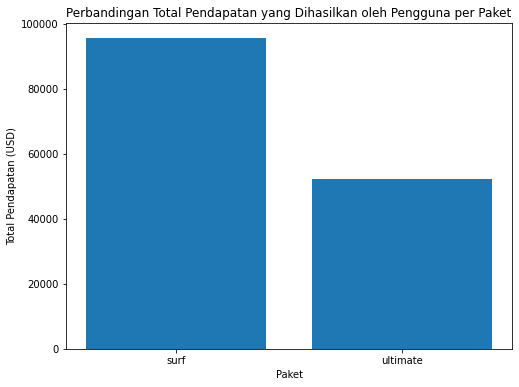

In [72]:
# Buat diagram batang
plt.figure(figsize=(8, 6))
plt.bar(total_revenue["plan"], total_revenue["total_payment"])
plt.xlabel("Paket")
plt.ylabel("Total Pendapatan (USD)")
plt.title("Perbandingan Total Pendapatan yang Dihasilkan oleh Pengguna per Paket")
plt.show()

**Kesimpulan Sementara**
* A. Pendapatan Paket "Surf":
    * Paket "surf" menghasilkan pendapatan yang lebih rendah dibandingkan dengan paket "ultimate."

* B. Pendapatan Paket "Ultimate":
    * Paket "ultimate" cenderung menghasilkan pendapatan yang lebih tinggi dibandingkan dengan paket "surf."

* C. Perbandingan Pendapatan Antar Paket:
    * Terdapat perbedaan yang signifikan dalam pendapatan yang dihasilkan oleh kedua paket, dengan paket "ultimate" menghasilkan pendapatan yang lebih tinggi.

* Perbedaan dalam pendapatan yang dihasilkan oleh setiap paket mencerminkan perbedaan dalam model bisnis dan penawaran layanan antara keduanya. Paket "ultimate" mungkin menawarkan fitur tambahan atau kuota yang lebih besar, yang dapat menghasilkan pendapatan yang lebih tinggi. Sementara itu, paket "surf" mungkin lebih terjangkau, sehingga menghasilkan pendapatan yang lebih rendah.

# Menguji Hipotesis Statistik

## Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

* Uji Statistik: Two sample independent

* Hipotesis :
     1. H0: Rata-rata pendapatan dari pengguna paket Surf dan Ultimate SAMA
     2. H1: Rata-rata pendapatan dari pengguna paket Surf dan Ultimate BERBEDA
    
    
* Alpha: 5%

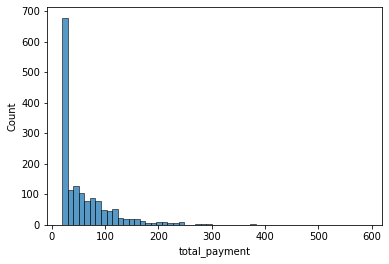

In [73]:
# prepare dataset surf
income_surf = df.loc[(df['plan']=='surf') & (df['total_payment'] > 0), 'total_payment']
sns.histplot(income_surf)
plt.show()

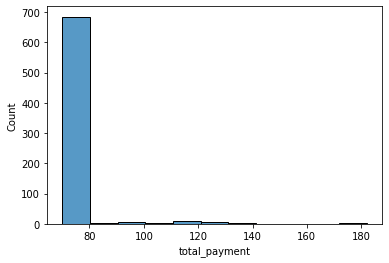

In [74]:
# prepare dataset ultimate
income_ultimate = df.loc[(df['plan']=='ultimate') & (df['total_payment'] > 0), 'total_payment']
sns.histplot(income_ultimate)
plt.show()

In [75]:
# Uji kenormalan dari distribusi duration surf dan ultimate
normality_test(income_surf)
print('==================')
normality_test(income_ultimate)

P-Value: 1.5414283107572988e-44

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal


P-Value: 0.0

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal


In [76]:
# Uji hipotesisnya
alpha = 0.05
statistic, p_value = mannwhitneyu(income_surf, income_ultimate, nan_policy='omit')
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata pendapatan dari pengguna paket Surf dan Ultimate SAMA')
else:
    print('H1 Diterima: Rata-rata pendapatan dari pengguna paket Surf dan Ultimate BERBEDA')

print('====================')
print('Rata-rata pendapatan di surf :', income_surf.mean())
print('Rata-rata pendapatan di ultimate :', income_ultimate.mean())

Alpha  : 0.05

P-Value: 1.912179587173433e-48

H1 Diterima: Rata-rata pendapatan dari pengguna paket Surf dan Ultimate BERBEDA


Rata-rata pendapatan di surf : 60.706408137317226

Rata-rata pendapatan di ultimate : 72.31388888888888


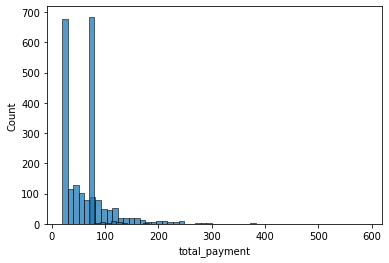

In [77]:
sns.histplot(income_surf)
sns.histplot(income_ultimate)
plt.show()

* Findings :
    * P-Value dari uji statistik rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf adalah 1.912179587173433e-48 %
    * Terdapat perbedaan yang signifikan antara rata-rata pendapatan dari pengguna paket surf dengan ultimate.

* Insights :
    * User yang menggunakan paket ultimate dan surf memiliki behavior total_payment yang berbeda.
    * Terdapat perbedaan behavior dari kedua paket customer tersebut meskipun paket surf terbilang murah tetapi malah ada customer paket tersebut ada yang total_payment nya tinggi melebihini customer paket ultimate.

* Recommendation :
    * Jika ingin lebih hemat, memilih paket ultimate adalah pilihan yang tepat karena biaya extra nya lebih murah daripada paket surf

## Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

* Uji Statistik: Two sample independent

* Hipotesis
    1. H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lainnya SAMA
    2. H1: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lainnya BERBEDA

* Alpha: 5%

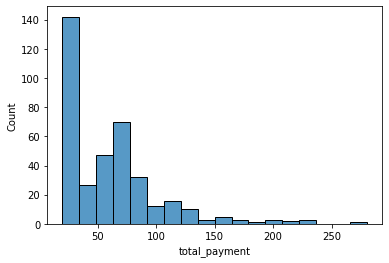

In [78]:
# Prepare dataset NY-NJ
income_nynj = df.loc[(df['is-nynj']==1) & (df['total_payment'] > 0), 'total_payment']
sns.histplot(income_nynj)
plt.show()

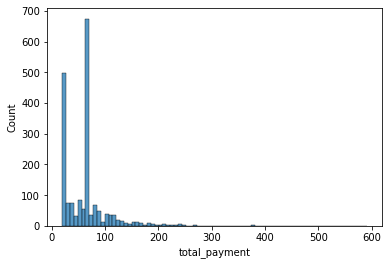

In [79]:
# Prepare dataset other
income_other = df.loc[(df['is-nynj']==0) & (df['total_payment'] > 0), 'total_payment']
sns.histplot(income_other)
plt.show()

In [80]:
# Uji Kenormalan dari distribusi duration surf dan ultimate
normality_test(income_nynj)
print('---------------------------')
normality_test(income_other)

P-Value: 9.16044367265658e-20

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal

---------------------------

P-Value: 0.0

Alpha  : 0.05

H1 Diterima: Distribusi data tersebut adalah tidak normal


In [81]:
# Uji hipotesisnya
alpha = 0.05
p_value = mannwhitneyu(income_nynj, income_other, nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lainnya SAMA')
else:
    print('H1 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lainnya BERBEDA')

print('=====================')
print('Rata2 call di surf', income_nynj.mean())
print('Rata2 call di ultimate', income_other.mean())

Alpha  : 0.05

P-Value: 0.003927631468615441

H1 Diterima: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lainnya BERBEDA


Rata2 call di surf 59.921352785145885

Rata2 call di ultimate 65.2227713987474


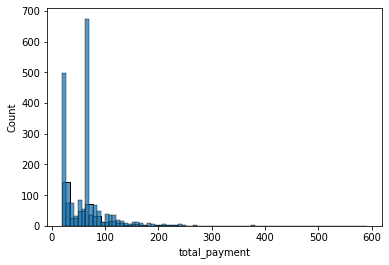

In [82]:
sns.histplot(income_nynj)
sns.histplot(income_other)
plt.show()

* Findings :
    * P-Value dari uji statistik rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain adalah 9.16044367265658e-20 %
    * Terdapat perbedaan yang signifikan anatara rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain

* Insights :
    * User di wilayah NY-NJ dengan user di wilayah lain memiliki behavior total_payment yang berbeda.
    * User di wilayah NY-NJ lebih banyak menggunakan paket surf, sedangkan user di wilayah lain lebih banyak menggunakan paket ultiamte 

# Kesimpulan Umum

 * A. Pra-pemrosesan
    * Berdasarkan data mentah, dapat disimpulkan 
    1. Tidak ada missing value dan nilai duplikat pada dataset
    2. Tipe data pada data tanggal masih dalam format string dan perlu di ubah ke format datetime
    3. Kelima dataset harus dijadikan satu
    4. Semua definisi dalam satu row harus dalam format bulanan
 
 
 * B. Data preparation
    1. Memperbaiki tipe data duration pada kolom calls
    2. Mengagregasikan kolom-kolom sesuai ketentuan yang diminta
    3. Melakukan pembulatan keatas pada kolom mb_per_month_included sesuai ketentuan
    4. Menghapus kolom yang tidak dibutuhkan pada tabel users, untuk mempermudah proses analisis
    5. Menggabungkan semua tabel, agar lebih mudah untuk dianalisis
    6. Menghapus kolom yang tidak perlu, untuk mempermudah analisis
    7. Mengisi kolom yang kosong dengan nilai 0 sesuai ketentuan dan menambah kolom baru.
    8. Membuat kolom baru yaitu total_payment yang merupakan jumlah total pembayaran user ketika membeli paket dan biaya tambahannya.
 
 
 * C. Exploratory Data Analysis (EDA)
 
    a. Berapakah total income di setiap paket per bulannya?
    * findings : 
        - Dari bulan april sampai desember paket surf memberikan kontribusi income yang lebih tinggi dibandingkan paket ultimate
        - Kedua Paket memiliki pertumbuhan income yang semakin tajam.
    * insight :
        - Kemungkinan hal yang menyebabkan total income di surf mampu mengalahkan ultimate adalah jumlah user yang semakin banyak
        - Paket yang lebih murah belum tentu memberikan kontribusi pendapatan yang sedikit.
        - Paket yang lebih mahal belum tentu memberikan kontribusi pendapatan yang banyak.

   b. Berapakah rata-rata income customer di setiap paket per bulannya?
    * findings :
        - Rata-rata pengeluaran orang untuk membeli paket internet perbulannya lebih tinggi pada paket surf daripada ultimate
        - Rata-rata pengeluaran orang untuk membeli paket surf perbulannya semakin naik setiap bulannya secara fluktuatif
    * insight : 
        - Pengguna paket surf biasanya membayar biaya tambahan untuk mendapat kuota internet / pulsa tambahan
        - Pengguna paket ultimate jarang yang membayar biaya tambahan untuk mendapat kuota internet / pulsa tambahan
    * recommendation :
        - Untuk pengguna disarankan untuk membeli paket ultimate karena benefitnya lebih banyak dan lebih murah daripada paket surf yang biaya tambahannya juga bertambah banyak terus.

   c. Bagaimana distribusi rata-rata pendapatan user di setiap paket?
    * Findings:
        - Pada paket ultimate, kebanyakan user mengeluarkan uang di kisaran 70-75 dollar.
        - Pada paket Surf, banyak user yang melebihi paketnya sehingga biayanya mencapai lebih dari 20 (yaitu 25 - 200).
        - Standar deviasi dan varians dari surf adalah 43.6 dan 1897.9
        - Standar deviasi dan varians dari ultimate adalah 7.4 dan 55.1
    * Insights
        - Sedikit user ultimate yang menambah paketnya.
        - Banyak user surf yang menambah paketnya bahkan pengeluarannya melebihi paket ultimate.
        - Income dari customer surf lebih bervariasi dibandingkan ultimate karena surf lebih banyak nambah paket. Dan value penambahannya bermacam-macam

   d. Bagaimana korelasi antara penggunaan internet dan pendapatan di setiap paket?
    * Paket surf
        * Findings :
        **Korelasi antara total payment dengan variabel lain di paket surf**

        * A. Korelasi kolom total_payment dengan kolom lain 
            1. Korelasi total_payment dengan gb_used adalah 0.89 artinya semakin banyak total_payment maka semakin tinggi pula gb_used yang digunakan (korelasi tinggi)
            2. Korelasi total_payment dengan duration adalah 0.28 artinya semakin banyak total_payment maka duration juga akan semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            3. Korelasi total_payment dengan sms adalah 0.17 artinya semakin banyak total_payment maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            4. Korelasi total_payment dengan age adalah 0.032 artinya jumlah total_payment tidak ada pengaruh terhadap usia

        * B. Korelasi kolom gb_used dengan kolom lain
            1. Korelasi gb_used dengan duration adalah 0.37 artinya semakin banyak gb_used digunakan maka durasi juga akan semakin naik akan tetapi tidak terlalu banyak (korelasi medium)
            2. Korelasi gb_used dengan sms adalah 0.16 artinya semakin banyak gb_used digunakan maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            3. Korelasi gb_used dengan age adalah 0.046 artinya jumlah gb_used tidak ada pengaruh terhadap usia

        * C. Korelasi kolom duration dengan kolom lain
            1. Korelasi duration dengan sms adalah 0.24 artinya semakin banyak durasi maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            2. Korelasi duration dengan age adalah -0.018 artinya jumlah durasi tidak ada pengaruh terhadap usia

        * D. Korelasi kolom sms dengan kolom lain
            1. Korelasi sms dengan age adalah -0.019 artinya jumlah sms tidak ada pengaruh terhadap usia

        * Berdasarkan visualisasi data diatas, grafik miring keatas setelah gb_used mencapai 15 gb, hal tersebut dapat disimpulkan bahwa korelasi gb_used penggunaan internet dengan total_payment memiliki korelasi yang kuat artinya semakin banyak penggunaan gb_used maka total_payment juga semakin tinggi (korelasi tinggi)

     * Paket Ultimate
        * Findings :
        **Korelasi antara total payment dengan variabel lain di paket ultimate**

        * A. Korelasi kolom total_payment dengan kolom lain 
            1. Korelasi total_payment dengan gb_used adalah 0.56 artinya semakin banyak total_payment maka cukup tinggi pula gb_used yang digunakan (korelasi medium)
            2. Korelasi total_payment dengan duration adalah jumlah total_payment tidak ada pengaruh terhadap durasi 
            3. Korelasi total_payment dengan sms adalah 0.17 artinya semakin banyak total_payment maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            4. Korelasi total_payment dengan age adalah 0.012 artinya jumlah total_payment tidak ada pengaruh terhadap usia

        * B. Korelasi kolom gb_used dengan kolom lain
            1. Korelasi gb_used dengan duration adalah 0.22 artinya semakin banyak gb_used digunakan maka durasi juga semakin naik akan tetapi tidak terlalu banyak (korelasi lemah)
            2. Korelasi gb_used dengan sms adalah 0.34 artinya semakin banyak gb_used digunakan maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi medium)
            3. Korelasi gb_used dengan age adalah -0.049 artinya jumlah gb_used tidak ada pengaruh terhadap usia

        * C. Korelasi kolom duration dengan kolom lain
            1. Korelasi duration dengan sms adalah 0.24 artinya semakin banyak durasi maka jumlah sms juga semakin naik akan tetapi tidak terlalu tinggi (korelasi lemah)
            2. Korelasi duration dengan age adalah 0.032 artinya jumlah durasi tidak ada pengaruh terhadap usia

        * D. Korelasi kolom sms dengan kolom lain
            1. Korelasi sms dengan age adalah 0.0078 artinya jumlah sms tidak ada pengaruh terhadap usia

        * Berdasarkan visualisasi data diatas, grafik miring keatas setelah gb_used mencapai 30 gb, hal tersebut dapat disimpulkan bahwa korelasi gb_used penggunaan internet dengan total_payment memiliki korelasi yang sedang artinya semakin banyak penggunaan gb_used maka total_payment juga semakin tinggi namun tidak terlalu tinggi.


 * D. Analisis Data Statistik

    * Mempelajari perilaku pengguna
    
    a. Panggilan
        * Findings :
            * P-Value dari uji statistik rata2 call antara paket surf dan ultimate adalah 61.4%
            * Tidak ada perbedaan rata2 call antara paket surf dengan ultimate.

        * Insights :
            * User yang menggunakan paket ultimate dan surf memiliki behavior call yang sama.
            * Artinya tidak ada perbedaan behavior dari kedua paket customer tersebut meskipun limitnya dari ultimate sangat tinggi

        * Recommendation :
            * Kita bisa kurangi benefit dari paket ultimate
            * Atau kita naikkan benefit call dari paket ultimate agar menarik customer. Karena mau dinaikkan berapapun, tidak ada durasi call mencapai 3000 menit
 
    b. Pesan/SMS

        * A. Perilaku Pengguna Paket "Surf":
            * Pengguna paket "surf" cenderung mengirim jumlah SMS yang lebih tinggi daripada pengguna paket "ultimate" setiap bulannya. Terdapat fluktuasi dalam jumlah SMS yang dikirim oleh pengguna paket "surf" dari bulan ke bulan, dengan beberapa bulan mungkin mengalami peningkatan signifikan dalam pengiriman pesan.

        * B. Perilaku Pengguna Paket "Ultimate":
            * Pengguna paket "ultimate" memiliki kecenderungan untuk mengirim jumlah SMS yang lebih rendah dibandingkan dengan pengguna paket "surf" setiap bulannya.
            * Meskipun jumlah SMS yang dikirim oleh pengguna paket "ultimate" lebih rendah, pola pengiriman pesan mereka lebih stabil dan memiliki variasi yang lebih kecil dari bulan ke bulan.
       
    * Dari kesimpulan di atas, terlihat bahwa perilaku pengguna terkait pengiriman pesan berbeda antara paket "surf" dan "ultimate." Pengguna paket "surf" cenderung lebih aktif dalam mengirim SMS, sementara pengguna paket "ultimate" memiliki tingkat pengiriman pesan yang lebih rendah tetapi lebih stabil dari waktu ke waktu. Hal ini bisa menjadi informasi berharga bagi operator telekomunikasi untuk memahami preferensi dan kebutuhan pelanggan berdasarkan paket yang mereka pilih.
 
    c. Internet

        * 1. Perilaku Pengguna Paket "Surf":
            * Pengguna paket "surf" memiliki kecenderungan untuk mengonsumsi jumlah traffic internet yang lebih rendah dibandingkan dengan pengguna paket "ultimate."

        * 2. Perilaku Pengguna Paket "Ultimate":
            * Pengguna paket "ultimate" cenderung mengonsumsi jumlah traffic internet yang lebih tinggi daripada pengguna paket "surf."

        * 3. Perbandingan Penggunaan Data Internet Antar Paket:
            * Terdapat perbedaan signifikan dalam konsumsi data internet antara kedua paket, dengan paket "ultimate" memiliki penggunaan yang lebih tinggi dibandingkan dengan paket "surf."

        * 4. Variabilitas Perilaku Pengguna:
            * Penggunaan data internet oleh pengguna paket "surf" cenderung lebih bervariasi, dengan beberapa pengguna mungkin mengonsumsi lebih sedikit data internet, sementara yang lain mungkin membutuhkan lebih banyak.

    * Perbedaan perilaku pengguna dalam mengonsumsi paket data internet antara paket "surf" dan "ultimate" dapat menjadi informasi yang berguna bagi operator telekomunikasi. Hal ini dapat digunakan untuk menyesuaikan kuota data dalam masing-masing paket, serta merancang promosi atau penawaran yang lebih sesuai dengan preferensi pelanggan.

    * PENDAPATAN
        * A. Pendapatan Paket "Surf":
            * Paket "surf" menghasilkan pendapatan yang lebih rendah dibandingkan dengan paket "ultimate."

        * B. Pendapatan Paket "Ultimate":
            * Paket "ultimate" cenderung menghasilkan pendapatan yang lebih tinggi dibandingkan dengan paket "surf."

        * C. Perbandingan Pendapatan Antar Paket:
            * Terdapat perbedaan yang signifikan dalam pendapatan yang dihasilkan oleh kedua paket, dengan paket "ultimate" menghasilkan pendapatan yang lebih tinggi.

    * Perbedaan dalam pendapatan yang dihasilkan oleh setiap paket mencerminkan perbedaan dalam model bisnis dan penawaran layanan antara keduanya. Paket "ultimate" mungkin menawarkan fitur tambahan atau kuota yang lebih besar, yang dapat menghasilkan pendapatan yang lebih tinggi. Sementara itu, paket "surf" mungkin lebih terjangkau, sehingga menghasilkan pendapatan yang lebih rendah.


 * E. Menguji Hipotesis Statistik

    1. Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

    * Findings :
        * P-Value dari uji statistik rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf adalah 1.912179587173433e-48 %
        * Terdapat perbedaan yang signifikan antara rata-rata pendapatan dari pengguna paket surf dengan ultimate.

    * Insights :
        * User yang menggunakan paket ultimate dan surf memiliki behavior total_payment yang berbeda.
        * Terdapat perbedaan behavior dari kedua paket customer tersebut meskipun paket surf terbilang murah tetapi malah ada customer paket tersebut ada yang total_payment nya tinggi melebihini customer paket ultimate.

    * Recommendation :
        * Jika ingin lebih hemat, memilih paket ultimate adalah pilihan yang tepat karena biaya extra nya lebih murah daripada paket surf

    2. Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

    * Findings :
        * P-Value dari uji statistik rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain adalah 9.16044367265658e-20 %
        * Terdapat perbedaan yang signifikan anatara rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain

    * Insights :
        * User di wilayah NY-NJ dengan user di wilayah lain memiliki behavior total_payment yang berbeda.
        * User di wilayah NY-NJ lebih banyak menggunakan paket surf, sedangkan user di wilayah lain lebih banyak menggunakan paket ultiamte 
 
